In [ ]:
# Data Analytics I 
# Create a Linear Regression Model using Python/R to predict home prices using Boston Housing 
# Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
# information about various houses in Boston through different parameters. There are 506 samples 
# and 14 feature variables in this dataset. 
# The objective is to predict the value of prices of the house using the given features. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [35]:
df.shape

(506, 14)

In [36]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [37]:
columns = ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']
df[columns] = df[columns].fillna(df[columns].mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [38]:
X = df.drop('MEDV',axis=1)
Y = df['MEDV']

In [39]:
xtrain, xtest, ytrain, ytest =  train_test_split(X,Y,test_size=0.2)

In [40]:
model = LinearRegression()

In [41]:
model.fit(xtrain,ytrain)

LinearRegression()

In [42]:
ypred = model.predict(xtest)

In [44]:
# A low MSE and a high R2 score are indicative of a good model fit.
# high- above 0.7 and low below 0.3

mse = mean_squared_error(ytest,ypred)
r2 = r2_score(ytest,ypred)

print("mse ",mse)
print("r2 ",r2)

mse  25.170318466416838
r2  0.6712936788881123


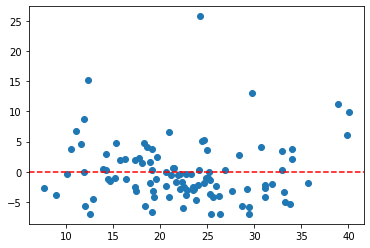

In [53]:
# In a good regression model, the residuals should be randomly scattered around the horizontal line at y=0.

import matplotlib.pyplot as plt

residuals = ytest - ypred
plt.scatter(ypred,residuals)
plt.axhline(y=0,color='r',linestyle='--')